# 应用: 糖尿病预测

![Image Name](https://cdn.kesci.com/upload/image/qdfr48kndl.png?imageView2/0/w/960/h/960)


### 准备工作：导入所需模块

In [23]:
import numpy as np
import pandas as pd

from pyecharts.charts import Scatter
from pyecharts.charts import Bar
from pyecharts import options as opts
from pyecharts.charts import Page

# from pyecharts.globals import CurrentConfig, NotebookType
# CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
# CurrentConfig.ONLINE_HOST

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import svm
from sklearn import linear_model
from sklearn import ensemble

from sklearn.metrics import mean_squared_error as mse   
from sklearn.model_selection import train_test_split, RandomizedSearchCV

import os
# os.chdir(r'/home/kesci')
os.chdir(r'../附加')

import warnings
warnings.filterwarnings('ignore')

### 第一步： 导入数据、划分数据集

In [2]:
diabetes = datasets.load_diabetes()
x = diabetes.data
y = diabetes.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 5)
print('done!')

done!


### 第二步： 查看数据特征

In [3]:
data_df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
data_df['target'] = diabetes.target
data_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### 第三步：根据数据特征判断属于哪一类问题
* 回归问题

![Image Name](https://cdn.kesci.com/upload/image/qdfr5qj3s5.png?imageView2/0/w/960/h/960)

* 下面对每一个特征的重要程度进行量化判定并用图表展示

In [4]:
# 查看各个特征的重要程度

gbr_reg = ensemble.GradientBoostingRegressor()
gbr_reg.fit(x, y)
    #也可以是x_train, y_train

GradientBoostingRegressor()

In [5]:
# 查看各个特征的重要程度

importances = gbr_reg.feature_importances_
importances

array([0.04804457, 0.01392529, 0.26100716, 0.10214903, 0.02856939,
       0.04482543, 0.04113023, 0.01614987, 0.40220916, 0.04198986])

In [6]:
# 将各个特征的重要程度展示在图上

importances_df = pd.DataFrame({
    'feature' : diabetes.feature_names,
    'importance' : importances
})  
importances_df.sort_values(by = 'importance', ascending = False, inplace = True)

    
#作图
bar = Bar()
bar.add_xaxis(importances_df.feature.tolist())
bar.add_yaxis(
    'importance', 
    importances_df.importance.tolist(), 
    label_opts = opts.LabelOpts(is_show = False))

bar.set_global_opts(
    title_opts = opts.TitleOpts(title = '糖尿病数据各特征重要程度'),
    xaxis_opts = opts.AxisOpts(axislabel_opts = opts.LabelOpts(rotate = 30)),
    datazoom_opts = [opts.DataZoomOpts()]
)
    
bar.render('diabetes_importances_bar.html')
bar.render_notebook()

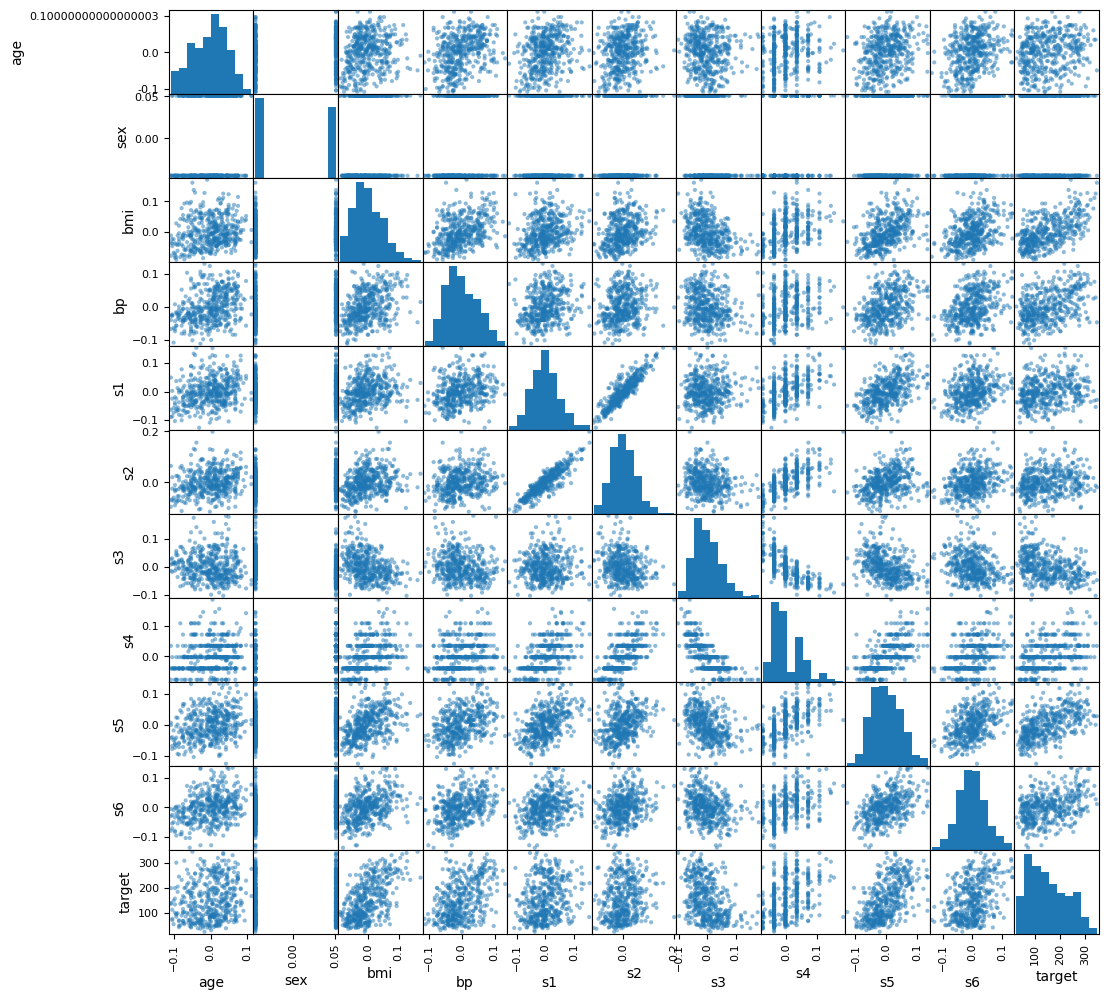

In [50]:
#将每一组特征数据分别对target作散点图，观察每一组特征值与target的关系     →    用pandas结合matplotlib的scatter_matrix会更简便
# print(diabetes.target)
# print(diabetes.data[:, 1])

# diabetes_scatters = Page()

# for i in range(len(diabetes.feature_names)):
#     scatter = Scatter()
#     scatter.add_xaxis(diabetes.data[:, i])
#     scatter.add_yaxis(
#         'target',                           
#         diabetes.target,
#         label_opts = opts.LabelOpts(is_show = False)
#     )
#     scatter.set_global_opts(
#         title_opts = opts.TitleOpts(title = diabetes.feature_names[i])
#         )
#     diabetes_scatters.add(scatter)

# 将特征和目标变量合并为一个 Pandas 数据框
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# 使用 scatter_matrix 函数绘制散点矩阵图
scatter_matrix(df, figsize=(12, 12))
plt.savefig('diabetes_features_scatters.jpg')#保存图片
plt.show()


# diabetes_scatters.render('diabetes_features_scatters.html')
# diabetes_scatters.render_notebook()

* 通过上面的展示进一步看出数据集中只有几个变量与目标值是较强相关的，因此选取lasso或者elasticnet模型即可。
* 这里选取Elastic Net

### 第四步：训练、评价模型，并调参，最后进行目标预测

* Lasso回归
* ElasticNet
* Ridge回归
* SVR
* GradientBoostingRegressor

In [28]:
# 1、Lasso

lasso = linear_model.Lasso(alpha = 0)
lasso.fit(x_train, y_train)
    #创建、训练模型

mse_ = mse(y_test, lasso.predict(x_test))
score = lasso.score(x_test, y_test)
print(f'MSE:{mse_}')
print(f'Score:{score}')
    #评价模型

MSE:3121.9580504757114
Score:0.5209056549495161


In [29]:
# 2、ElasticNet

e_net = linear_model.ElasticNet(alpha = 0)
e_net.fit(x_train, y_train)

mse_ = mse(y_test, e_net.predict(x_test))
score = e_net.score(x_test, y_test)
print(f'MSE:{mse_}')
print(f'Score:{score}')

MSE:3121.9580504757114
Score:0.5209056549495161


In [30]:
# 3、Ridge

ridge = linear_model.Ridge(alpha = 0)
ridge.fit(x_train, y_train)

mse_ = mse(y_test, ridge.predict(x_test))
score = ridge.score(x_test, y_test)
print(f'MSE:{mse_}')
print(f'Score:{score}')

MSE:3121.95805027022
Score:0.5209056549810508


In [31]:
# 4、SVR(kernel = 'linear')  #线性内核

svr = svm.SVR(kernel = 'linear')
svr.fit(x_train, y_train)

mse_ = mse(y_test, ridge.predict(x_test))
score = svr.score(x_test, y_test)
print(f'MSE:{mse_}')
print(f'Score:{score}')

MSE:3121.95805027022
Score:-0.006954474877085781


In [32]:
# 5、SVR(kernel = 'rbf')     #高斯内核

svr = svm.SVR(kernel = 'rbf')
svr.fit(x_train, y_train)

mse_ = mse(y_test, ridge.predict(x_test))
score = svr.score(x_test, y_test)
print(f'MSE:{mse_}')
print(f'Score:{score}')

MSE:3121.95805027022
Score:0.1340016034549978


In [33]:
# 6、GradientBoostingRegressor  #梯度提升决策树，容易过拟合

gbr_reg = ensemble.GradientBoostingRegressor()
gbr_reg.fit(x_train, y_train)

mse_ = mse(y_test, gbr_reg.predict(x_test))
score = gbr_reg.score(x_test, y_test)
print(f'MSE:{mse_}')
print(f'Score:{score}')

MSE:3461.667814506002
Score:0.46877394008533124


* 可以看到lasso、ElasticNet、ridge效果最好，而且评分几乎一致。

### 这里选取ElasticNet模型进行下一步操作（也可以选取多个比对预测效果）

In [34]:
# 自动调参(参数组合和迭代次数较多，过程相对较慢)  → 每次训练结果不同，因为是随机组合参数训练模型n_iter次

alpha_range = np.arange(0, 1, 0.1)
l1_ratio_range = np.arange(0, 1, 0.1)                
max_iter_range = range(1000, 10000, 1000)   
    #设置参数区间（自定义）

param_grid = {
    'alpha' : alpha_range,
    'l1_ratio' : l1_ratio_range,
    'max_iter' : max_iter_range    
}

e_net_search = RandomizedSearchCV(e_net, param_grid, n_iter = 3000)
e_net_search.fit(x_train, y_train)

print(e_net_search.best_score_)
print(e_net_search.best_params_)
print(e_net_search.best_estimator_)

0.45598699430137934
{'max_iter': 1000, 'l1_ratio': 0.0, 'alpha': 0.0}
ElasticNet(alpha=0.0, l1_ratio=0.0)


In [35]:
# 用得到的最优参数组合重新训练模型并评价
e_net = linear_model.ElasticNet(alpha = 0, l1_ratio = 0, max_iter = 2000)
e_net.fit(x_train, y_train)
mse_ = mse(y_test, e_net.predict(x_test))
score = e_net.score(x_test, y_test)
print(f'MSE:{mse_}')
print(f'Score:{score}')

MSE:3121.95805027022
Score:0.5209056549810508


* 可以看到模型效果提升不大

In [36]:
# 预测数据(以x_test预测)

y_predict = e_net.predict(x_test)

### 第五步：将结果可视化

In [37]:
# 为每一个测试数据标记id，并查看数据长度是否一致（正常来说肯定是一致的，严谨起见还是打印确认一下）

id_ = list(range(1, len(y_test) + 1))
print(len(id_))
print(len(y_test))
print(len(y_predict))

133
133
133


In [38]:
scatter = Scatter()
scatter.add_xaxis(id_)
scatter.add_yaxis(
    'y_predict',                           
    y_predict,
    label_opts = opts.LabelOpts(is_show = False)
)
scatter.add_yaxis(
    'y_test',                           
    y_test,
    label_opts = opts.LabelOpts(is_show = False)
)
scatter.set_global_opts(
    title_opts = opts.TitleOpts(title = 'diabetes预测值与真实值分布'),
    xaxis_opts = opts.AxisOpts(name = 'id_'),
    yaxis_opts = opts.AxisOpts(name = 'target'),
    datazoom_opts = [opts.DataZoomOpts()]
)

scatter.render('diabetes_scatter1.html')
scatter.render_notebook()

* 预测效果越准确，散点重合度越高

In [45]:
scatter = Scatter()
scatter.add_xaxis(y_test.data)
scatter.add_yaxis(
    'y_predict',                           
    y_predict.data,
    label_opts = opts.LabelOpts(is_show = False)
)
scatter.add_yaxis('y_predict',y_test.data)

scatter.set_global_opts(
    title_opts = opts.TitleOpts(title = 'diabetes预测值对真实值分布'),
    xaxis_opts = opts.AxisOpts(name = '真实值'),
    yaxis_opts = opts.AxisOpts(name = '预测值'),
)

scatter.render('diabetes_scatter2.html')
scatter.render_notebook()

# 将特征和目标变量合并为一个 Pandas 数据框
# df = pd.DataFrame(data=y_test.data, columns=y_predict.data)
# df['y_predict'] = diabetes.y_predict

# 使用 scatter_matrix 函数绘制散点矩阵图
# scatter_matrix(df, figsize=(12, 12))
# plt.savefig('diabetes_scatter2.jpg')#保存图片
# plt.show()


* 预测效果越准确，散点越趋向于成一条直线（不理解的可以尝试用y_test对y_test作图）